<a href="https://colab.research.google.com/github/yweslakarep123/mushroom_classification_enhanced/blob/main/Mushhroom_Classification_Enhanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>BACKGROUND</h1>
<a href = https://www.kaggle.com/datasets/sakurapuare/mushroom-classification-enhanced/data target="_blank">DATASET LINK</a>

<p>Mushrooms are a beloved delicacy among people, but beneath their glamorous appearance, they may harbor deadly dangers. China is one of the countries with the largest variety of mushrooms in the world. At the same time, mushroom poisoning is one of the most serious food safety issues in China. According to relevant reports, in 2021, China conducted research on 327 mushroom poisoning incidents, involving 923 patients and 20 deaths, with a total mortality rate of 2.17%. For non professionals, it is impossible to distinguish between poisonous mushrooms and edible mushrooms based on their appearance, shape, color, etc. There is no simple standard that can distinguish between poisonous mushrooms and edible mushrooms. To determine whether mushrooms are edible, it is necessary to collect mushrooms with different characteristic attributes and analyze whether they are toxic. In this competition, 22 characteristic attributes of mushrooms were analyzed to obtain a mushroom usability model, which can better predict whether mushrooms are edible.</p>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [4]:
!chmod 600 /content/kaggle.json

In [5]:
!kaggle datasets download -d sakurapuare/mushroom-classification-enhanced

Dataset URL: https://www.kaggle.com/datasets/sakurapuare/mushroom-classification-enhanced
License(s): other
100% 322k/322k [00:00<00:00, 664kB/s]
100% 322k/322k [00:00<00:00, 663kB/s]


In [6]:
!pip install patool pyunpack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 2.9 MB/s eta 0:00:00


In [7]:
from pyunpack import Archive
zip_file_path = '/content/mushroom-classification-enhanced.zip'
extract_directory = '/content/drive/MyDrive/Test_dataset'
# Buka dan ekstrak file ZIP menggunakan patool
Archive(zip_file_path).extractall(extract_directory)

# Output pesan jika ekstraksi selesai
print("Ekstraksi selesai.")

Ekstraksi selesai.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
file_path = '/content/drive/MyDrive/Test_dataset/mushroom.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset
data.head()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,n,f,n,f,w,n,b,...,y,w,p,NaN,n,o,p,w,v,NaN
1,p,NaN,y,g,t,NaN,f,c,b,k,...,s,n,c,p,w,n,e,NaN,y,g
2,e,b,y,n,t,n,f,c,NaN,n,...,s,p,NaN,p,w,o,p,b,y,w
3,e,x,g,g,t,n,f,w,b,n,...,s,p,NaN,p,w,n,n,NaN,NaN,d
4,e,NaN,f,NaN,t,n,a,w,n,n,...,k,NaN,w,p,w,NaN,l,w,v,d


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25986 entries, 0 to 25985
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     25986 non-null  object
 1   cap-shape                 22513 non-null  object
 2   cap-surface               22507 non-null  object
 3   cap-color                 22527 non-null  object
 4   ruises                    22514 non-null  object
 5   odor                      22536 non-null  object
 6   gill-attachment           22505 non-null  object
 7   gill-spacing              22587 non-null  object
 8   gill-size                 22494 non-null  object
 9   gill-color                22418 non-null  object
 10  stalk-shape               22512 non-null  object
 11  stalk-root                22458 non-null  object
 12  stalk-surface-above-ring  22478 non-null  object
 13  stalk-surface-below-ring  22563 non-null  object
 14  stalk-color-above-ring

In [31]:
data.isnull().sum()

class                          0
cap-shape                   3473
cap-surface                 3479
cap-color                   3459
ruises                      3472
odor                        3450
gill-attachment             3481
gill-spacing                3399
gill-size                   3492
gill-color                  3568
stalk-shape                 3474
stalk-root                  3528
stalk-surface-above-ring    3508
stalk-surface-below-ring    3423
stalk-color-above-ring      3573
stalk-color-below-ring      3433
veil-type                   3497
veil-color                  3503
ring-number                 3489
ring-type                   3508
spore-print-color           3493
population                  3511
habitat                     3484
dtype: int64

In [32]:
data.drop_duplicates(inplace=True)
data.shape

(25986, 23)

In [45]:
data = data.fillna(data.mode().iloc[0])

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25986 entries, 0 to 25985
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     25986 non-null  object
 1   cap-shape                 25986 non-null  object
 2   cap-surface               25986 non-null  object
 3   cap-color                 25986 non-null  object
 4   ruises                    25986 non-null  object
 5   odor                      25986 non-null  object
 6   gill-attachment           25986 non-null  object
 7   gill-spacing              25986 non-null  object
 8   gill-size                 25986 non-null  object
 9   gill-color                25986 non-null  object
 10  stalk-shape               25986 non-null  object
 11  stalk-root                25986 non-null  object
 12  stalk-surface-above-ring  25986 non-null  object
 13  stalk-surface-below-ring  25986 non-null  object
 14  stalk-color-above-ring

In [47]:
data.head()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,n,f,n,f,w,n,b,...,y,w,p,p,n,o,p,w,v,d
1,p,x,y,g,t,n,f,c,b,k,...,s,n,c,p,w,n,e,w,y,g
2,e,b,y,n,t,n,f,c,b,n,...,s,p,w,p,w,o,p,b,y,w
3,e,x,g,g,t,n,f,w,b,n,...,s,p,w,p,w,n,n,w,v,d
4,e,x,f,n,t,n,a,w,n,n,...,k,w,w,p,w,o,l,w,v,d


In [49]:
data['cap-shape'].unique()

array(['x', 'b', 'f', 's', 'k', 'c'], dtype=object)

In [50]:
data['class'].unique()

array(['e', 'p'], dtype=object)

In [76]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [94]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap

<Axes: >

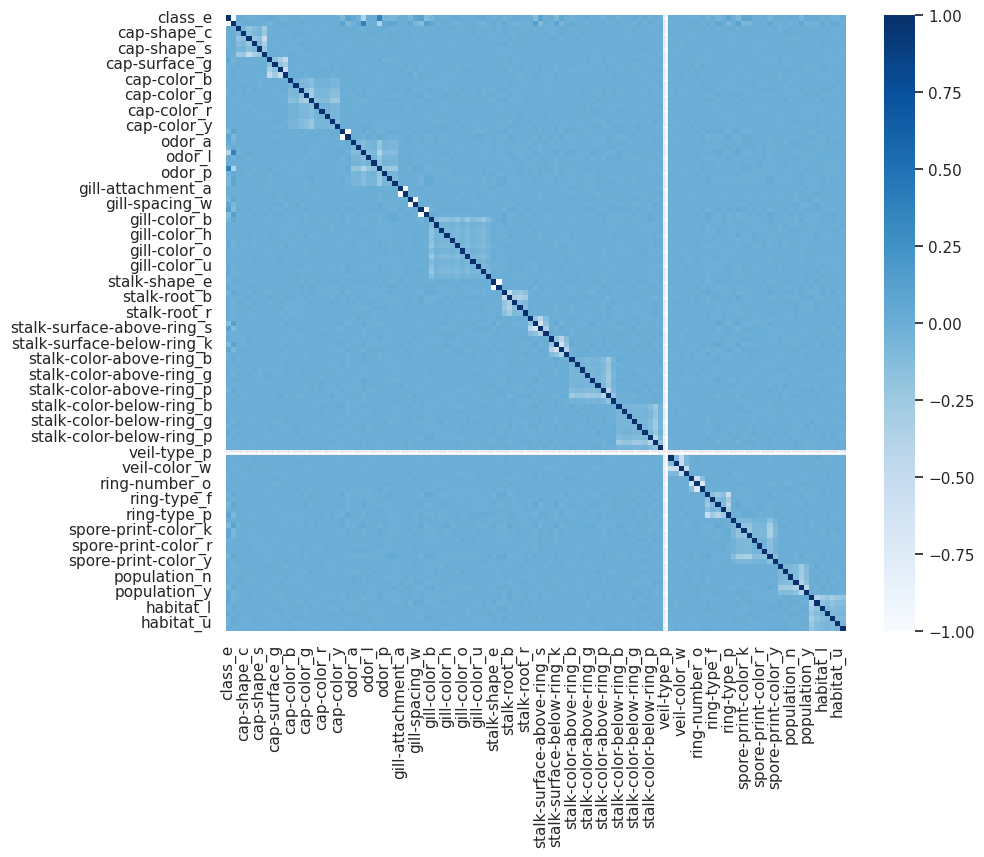

In [55]:
import seaborn as sns

data_encoded = pd.get_dummies(data)

corr = data_encoded.corr()

sns.set(rc={'figure.figsize': (10, 8)})

sns.heatmap(corr, cmap="Blues")

In [95]:
X = data.drop('class', axis=1)
y = data['class']

In [96]:
X_encoded = one_hot_encoder.fit_transform(X)

In [79]:
y_encoded = label_encoder.fit_transform(y)

In [97]:
encoded_columns = one_hot_encoder.get_feature_names_out(X.columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

In [107]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [108]:
# Make predictions
y_pred_svm = model_svm.predict(X_test)

# Specify the positive class label
positive_class = 'e'  # or 'p', depending on your context

# Calculate metrics with the specified positive class
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, pos_label=positive_class)
recall = recall_score(y_test, y_pred_svm, pos_label=positive_class)
f1 = f1_score(y_test, y_pred_svm, pos_label=positive_class)
confusion = confusion_matrix(y_test, y_pred_svm)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion)

# Show predictions
print("Predictions:", y_pred_svm)


Accuracy: 0.7424009234320893
Precision: 0.7345565749235474
Recall: 0.8360598677340759
F1 Score: 0.7820283249226763
Confusion Matrix:
 [[2402  471]
 [ 868 1457]]
Predictions: ['p' 'p' 'e' ... 'p' 'e' 'e']
